#linear regression for numerical dataset with least mean square  method
X = [0.0, 8.0, 10.0,15.0, 22.0, 35,100,120]
Y = [32, 46.4, 41,59, 71.6, 95,200,245]

In [137]:
##Toy Numerical Dataset
X = [0.0, 8.0, 10.0,15.0, 22.0, 35,100,120]
Y = [32, 46.4, 41,59, 71.6, 95,200,245]

In [138]:
#Prediction
def predict(m,b,X):
  return m*X+b

In [139]:
#Error
def error(m,b,x,y):
  return predict(m,b,x) - y


In [140]:
#Sum of squared error
def sum_square_error(m,b,X,Y):
  errored=0
  no_of_element = len(X)
  for i in range(no_of_element):
    errored+=error(m,b,x[i],y[i])
  return errored**2

In [141]:
#The Fit Method
import numpy as np
def least_square_mean_fit(X,Y):
  x_mean = np.mean(X)
  y_mean = np.mean(Y)
  ## Total number of values
  total_no_values=len(X)
  corr=0
  std=0
  for i in range(total_no_values):
    corr+=((X[i]-x_mean) * (Y[i]-y_mean))
    std+=(X[i] - x_mean)**2
  m=corr/std
  b=y_mean - (m*x_mean)
  return m,b

In [142]:
m,b = least_square_mean_fit(X,Y)

print(m,",",b)

1.7502951227089159 , 30.92606399502951


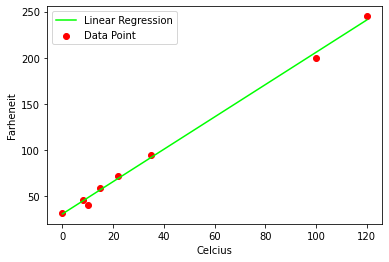

In [143]:
import matplotlib.pyplot as plt
x_max = np.max(X) 
x_min = np.min(X) 

x = np.linspace(x_min, x_max, 1000)
y = b + m * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Celcius')
#y-axis label
plt.ylabel('Farheneit')
plt.legend()
plt.show()

#linear regression for dataframe with least mean square  method

In [144]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('car data.csv')
print(dataset.shape)
dataset.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [145]:
# initializing our inputs and outputs
X = dataset['Present_Price'].values
Y = dataset['Selling_Price'].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the m and b
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
m = numerator / denominator
b = y_mean - (m * x_mean)
#printing the coefficient
print("m=",m,"b=", b)

m= 0.5168490273953972 b= 0.7185274709817637


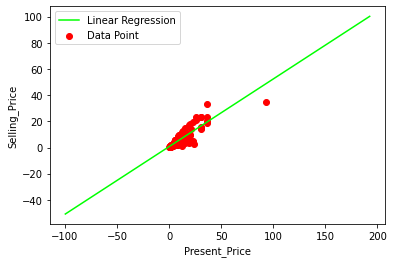

In [146]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b+ m * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Present_Price')
#y-axis label
plt.ylabel('Selling_Price')
plt.legend()
plt.show()

In [147]:
#Root Mean Squared Error
rmse = 0
for i in range(n):
    y_pred=  b + m* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

2.4197292177124603


In [148]:
#R squared error 
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b+ m * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.7726103146985801


#linear regression for a data generator imported from sklearn with the gradient descent method 

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

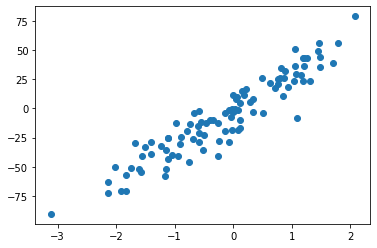

In [150]:
x,y=make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

In [151]:
print(x.shape,y.shape)

(100, 1) (100,)


In [152]:
y=y.reshape(100,1)
y.shape

(100, 1)

In [153]:
#matrice X 
X=np.hstack((x,np.ones(x.shape)))
X.shape

(100, 2)

In [154]:
theta=np.random.randn(2,1)
theta

array([[-0.46448981],
       [-0.46293432]])

In [155]:
#model
def model(X,theta):
  return X.dot(theta)

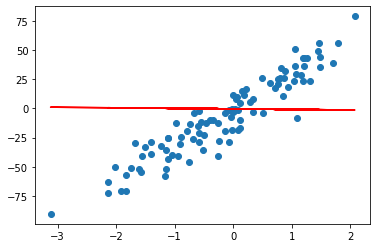

In [156]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),'r')

In [157]:
#cost function 
def cost_function(X,y,theta):
  n=len(y)
  return (1/2*n)* np.sum((model(X,theta)-y)**2)

In [158]:
cost_function(X,y,theta)

6017537.476251702

un cout catastrophique car notre nodele n'est pas encore entrainé

In [159]:
#Gradient 
def grad(X,y,theta):
  n=len(y)
  return (1/n)*X.T.dot(model(X,theta)-y)

In [160]:
# Gradient descent
def gradient_descent(X,y,theta,learning_rate,n_iterations):
  for i in range(0,n_iterations):
    theta=theta-learning_rate*grad(X,y,theta)
  return theta 

In [161]:
theta_final=gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000)
theta_final

array([[29.7806768],
       [-2.3655028]])

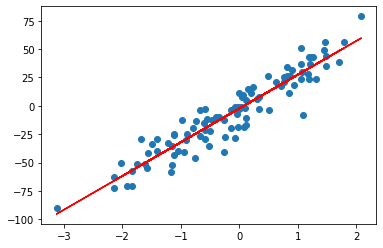

In [162]:
plt.scatter(x,y)
plt.plot(x,model(X,theta_final),'r')

In [163]:
#R square 
def coef_determination(y,pred):
  u=((y-pred)**2).sum()
  v=((y-y.mean())**2).sum()
  return 1-u/v
  

In [164]:
pred=model(X,theta_final)
coef_determination(y,pred)

0.8833495572797464

#linear regression for dataframe with the gradient descent method 

In [165]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('car data.csv')
print(dataset.shape)
dataset.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [166]:
x = dataset['Present_Price'].values
y = dataset['Selling_Price'].values
x=x.reshape(301,1)
y=y.reshape(301,1)
X=np.hstack((x,np.ones(x.shape)))

print(X.shape,y.shape)

(301, 2) (301, 1)


In [167]:
theta_final=gradient_descent(X,y,theta,learning_rate=0.001,n_iterations=1000)

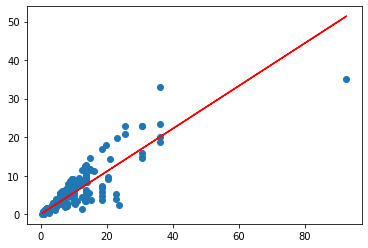

In [168]:
plt.scatter(x,y)
plt.plot(x,model(X,theta_final),'r')

In [169]:
pred=model(X,theta_final)
coef_determination(y,pred)

0.763664355625258